<a href="https://www.kaggle.com/code/guillermorosasn/eda-for-ds-salaries?scriptVersionId=157171233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/data-science-salaries-2023/ds_salaries.csv


# 1. Introduction

Data library extracted from website ai-jobs.net:

* **work_year:** The year the salary was paid.
* **experience_level:** The experience level in the job during the year
* **employment_type:** The type of employment for the role
* **job_title:** The role worked in during the year.
* **salary:** The total gross salary amount paid.
* **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
* **salaryinusd:** The salary in USD
* **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio:** The overall amount of work done remotely
* **company_location:** The country of the employer's main office or contracting branch
* **company_size:** The median number of people that worked for the company during the year

# 2. Feature Analysis

In [2]:
path='/kaggle/input/data-science-salaries-2023/ds_salaries.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Categorical variables distribution

#### Experience level - Employment type - company size

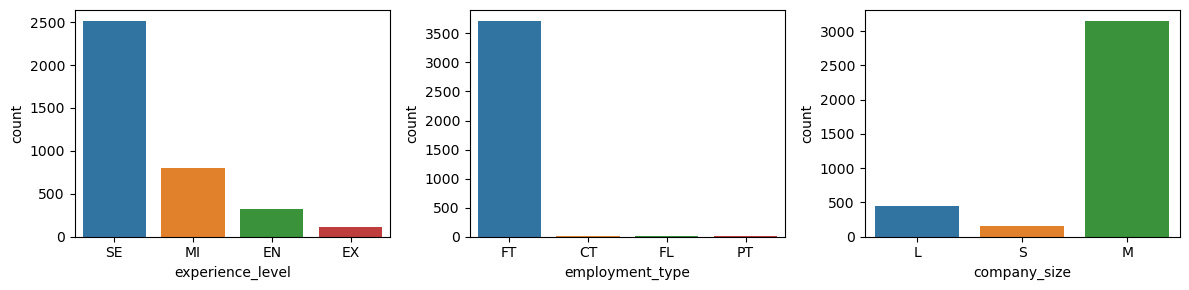

In [5]:
cat_vars = ['experience_level', 'employment_type', 'company_size']
fig, axes = plt.subplots(nrows=len(cat_vars)//3, ncols=3, figsize = (12,3))
axes = axes.flatten()
for i, cat_var in enumerate(cat_vars):
    sns.countplot(x=cat_var, data = df, ax = axes[i])
plt.tight_layout()
plt.show()

In the data, lots of seniors, full-time jobs, and medium-sized companies stand out.

#### Job title

In [6]:
df.job_title.value_counts().to_frame().shape

(93, 1)

The table features numerous variables, inviting a focused pareto analysis.

In [7]:
job_title_rank = df['job_title'].value_counts().to_frame()
total = job_title_rank['job_title'].sum()
job_title_rank['percentage'] = round(100*(job_title_rank['job_title']/total),0)
job_title_rank['cumulative_percentage'] = round(job_title_rank['job_title'].cumsum()/job_title_rank['job_title'].sum()*100,0)
job_title_rank.head(10)

,job_title,percentage,cumulative_percentage
Data Engineer,1040,28.0,28.0
Data Scientist,840,22.0,50.0
Data Analyst,612,16.0,66.0
Machine Learning Engineer,289,8.0,74.0
Analytics Engineer,103,3.0,77.0
Data Architect,101,3.0,79.0
Research Scientist,82,2.0,82.0
Data Science Manager,58,2.0,83.0
Applied Scientist,58,2.0,85.0
Research Engineer,37,1.0,86.0


7 first job positions above represent the 82% of total. Im going to reduce categories by labeling the rest 18% as others in a new feature and save it in a new column, mantaining the original column for further possible outliers analysis.

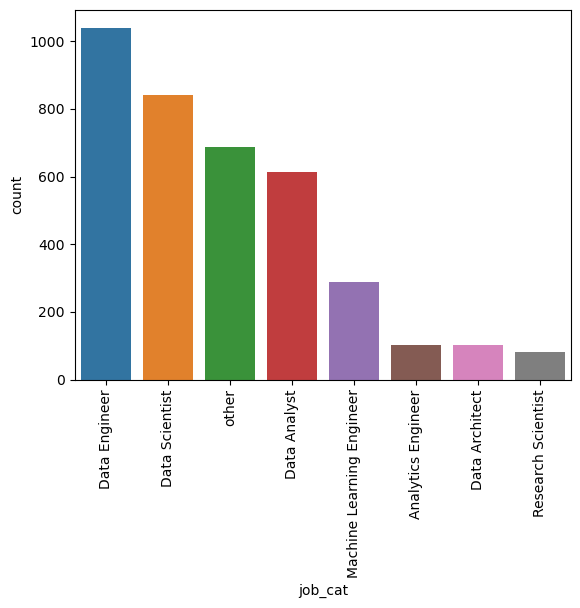

In [8]:
df['job_cat'] = df['job_title']
job_title_list = ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Research Scientist']
df.loc[~df['job_title'].isin(job_title_list), 'job_cat'] = 'other'
order = df['job_cat'].value_counts().index
sns.countplot(x='job_cat', data = df, order=order)
plt.xticks(rotation=90)
plt.show()

Data Engineers, Scientists, and Analysts comprise 66% of the dataset.

#### Company location

In [9]:
df.company_location.value_counts().to_frame().shape

(72, 1)

The table features numerous variables, inviting a focused pareto analysis.The table features numerous variables, inviting a focused pareto analysis.

In [10]:
company_location_rank = df['company_location'].value_counts().to_frame()
total = company_location_rank['company_location'].sum()
company_location_rank['percentage'] = round(100*(company_location_rank['company_location']/total),0)
company_location_rank['cumulative_percentage'] = round(company_location_rank['company_location'].cumsum()/company_location_rank['company_location'].sum()*100,0)
company_location_rank.head(10)

,company_location,percentage,cumulative_percentage
US,3040,81.0,81.0
GB,172,5.0,86.0
CA,87,2.0,88.0
ES,77,2.0,90.0
IN,58,2.0,91.0
DE,56,1.0,93.0
FR,34,1.0,94.0
BR,15,0.0,94.0
AU,14,0.0,95.0
GR,14,0.0,95.0


US companies represent 81% of total data

#### Employee residence

In [11]:
df.employee_residence.value_counts().to_frame().shape

(78, 1)

The table features numerous variables, inviting a focused pareto analysis.

In [12]:
employee_residence_rank = df['employee_residence'].value_counts().to_frame()
total = employee_residence_rank['employee_residence'].sum()
employee_residence_rank['percentage'] = round(100*(employee_residence_rank['employee_residence']/total),0)
employee_residence_rank['cumulative_percentage'] = round(employee_residence_rank['employee_residence'].cumsum()/employee_residence_rank['employee_residence'].sum()*100,0)
employee_residence_rank.head(10)

,employee_residence,percentage,cumulative_percentage
US,3004,80.0,80.0
GB,167,4.0,84.0
CA,85,2.0,87.0
ES,80,2.0,89.0
IN,71,2.0,91.0
DE,48,1.0,92.0
FR,38,1.0,93.0
PT,18,0.0,94.0
BR,18,0.0,94.0
GR,16,0.0,94.0


US residents represent 80% of total data

#### Salary currency

In [13]:
df.salary_currency.value_counts().to_frame().shape

(20, 1)

The table features numerous variables, inviting a focused pareto analysis.

In [14]:
salary_currency_rank = df['salary_currency'].value_counts().to_frame()
total = salary_currency_rank['salary_currency'].sum()
salary_currency_rank['percentage'] = round(100*(salary_currency_rank['salary_currency']/total),0)
salary_currency_rank['cumulative_percentage'] = round(salary_currency_rank['salary_currency'].cumsum()/salary_currency_rank['salary_currency'].sum()*100,0)
salary_currency_rank.head(10)

,salary_currency,percentage,cumulative_percentage
USD,3224,86.0,86.0
EUR,236,6.0,92.0
GBP,161,4.0,96.0
INR,60,2.0,98.0
CAD,25,1.0,99.0
AUD,9,0.0,99.0
SGD,6,0.0,99.0
BRL,6,0.0,99.0
PLN,5,0.0,99.0
CHF,4,0.0,99.0


USD currency represent 86% of total data

## Numerical variables distribution

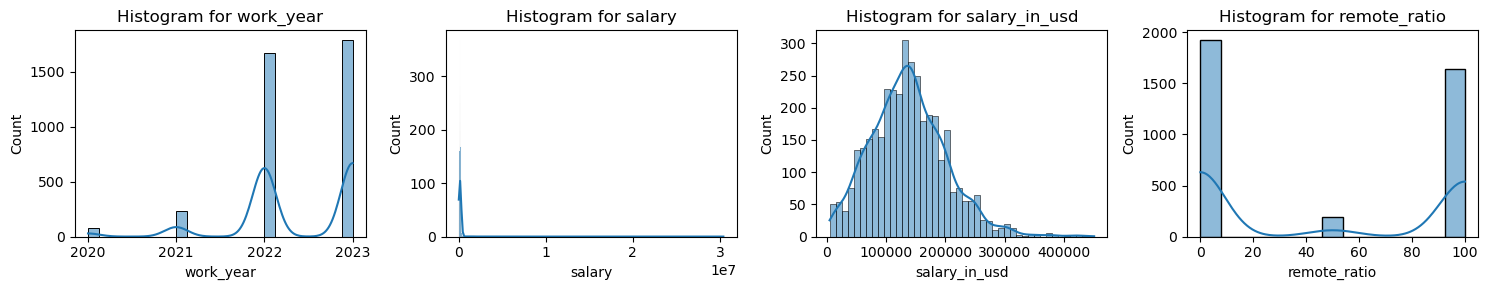

In [15]:
numerical_columns = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numerical_columns) // 4, ncols=4, figsize=(15, 3))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {col}')
plt.tight_layout()
plt.show()

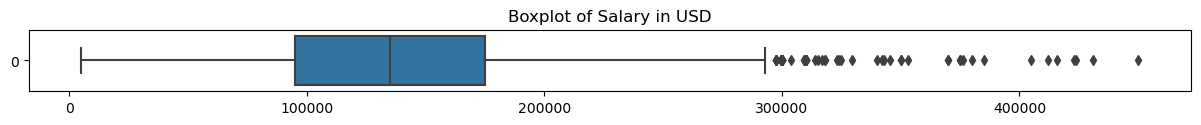

In [16]:
plt.figure(figsize=(15,0.8))
sns.boxplot(df['salary_in_usd'], orient='h')
plt.title('Boxplot of Salary in USD')
plt.show()

The graphs highlights substantial contributions in 2022 and 2023, with a peak around $140,000 USD salary, displaying a right-skewed distribution and a balanced remote-to-non-remote ratio.

In [17]:
limits = np.percentile(df['salary_in_usd'], [25, 75])
iqr = limits[1] - limits[0]
upper_limit = limits[1] + 1.5 * iqr
print('As a refference upper limit in Senior salaries is ', upper_limit, ', all points above this level are considered as outliers.')

As a refference upper limit in Senior salaries is  295000.0 , all points above this level are considered as outliers.


# 3. Multivariate Analysis

Analysis of salary vs experience level , company size, employment type and work year

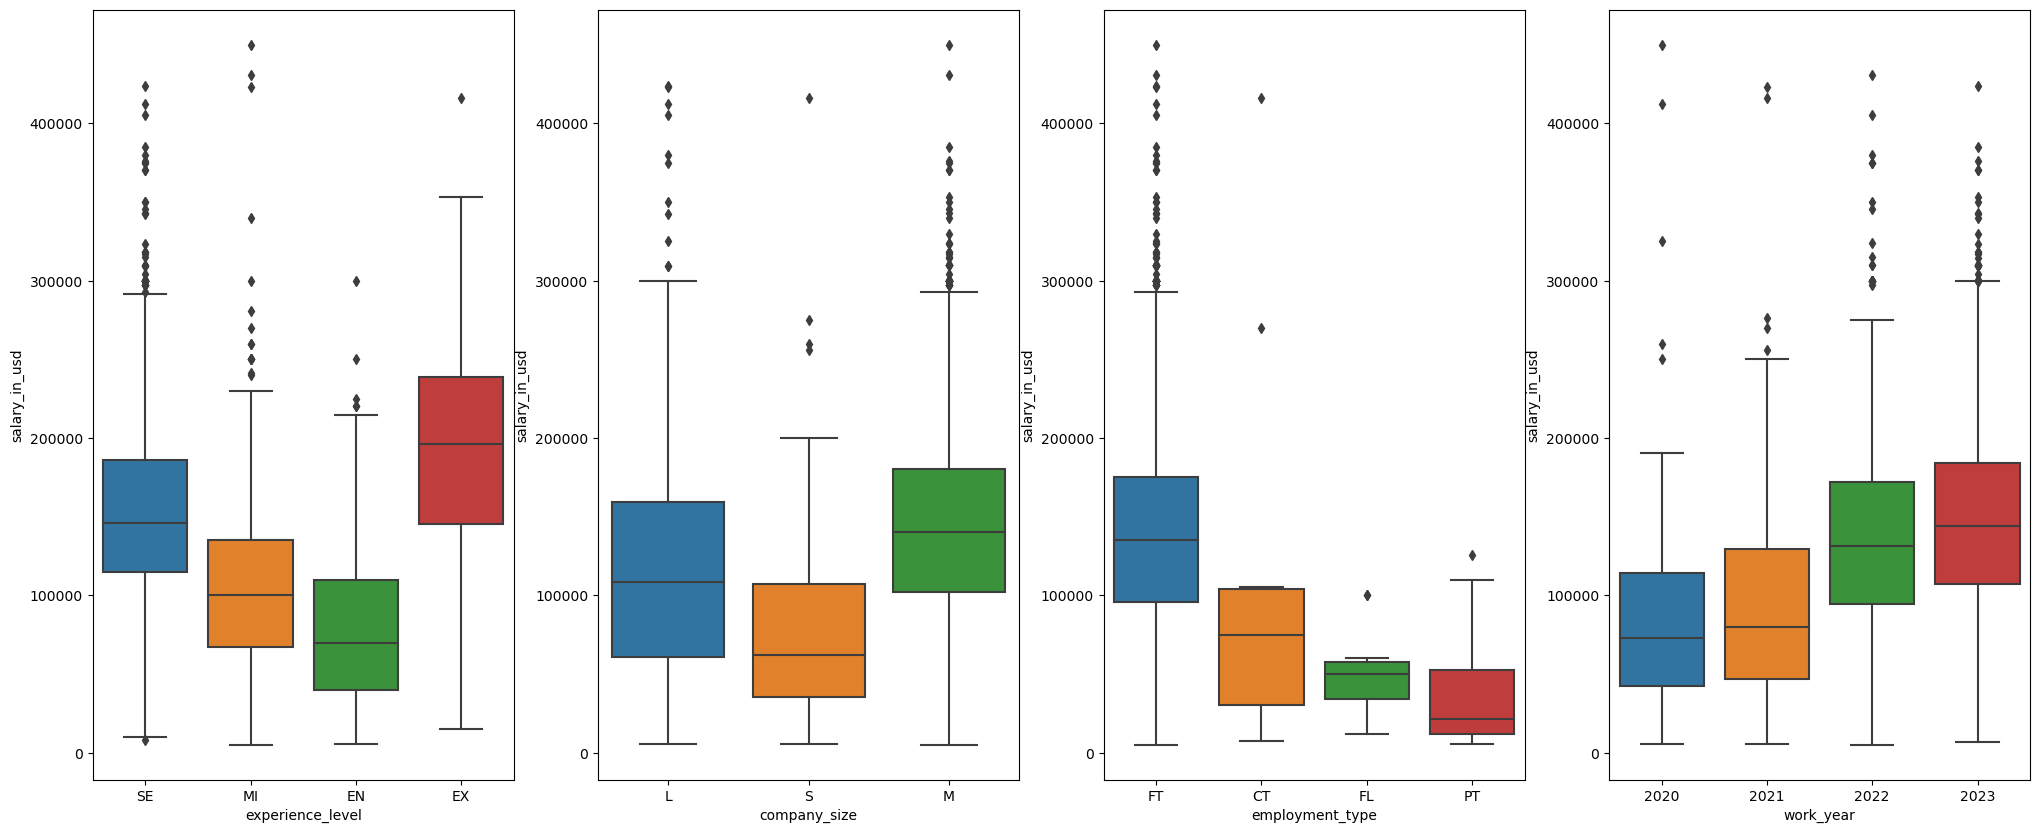

In [18]:
fig, axs = plt.subplots(1,4,figsize=(25,10))
sns.boxplot(data=df, x=df['experience_level'],y=df['salary_in_usd'],ax=axs[0])
sns.boxplot(data=df, x=df['company_size'],y=df['salary_in_usd'],ax=axs[1])
sns.boxplot(data=df, x=df['employment_type'],y=df['salary_in_usd'],ax=axs[2])
sns.boxplot(data=df, x=df['work_year'],y=df['salary_in_usd'],ax=axs[3])
plt.show()

The multiple side by side boxplot shows:

**Experience level vs USD salary:**
* Median variates among categories, lowest at entrance level and higest at expert level.
* Interesting outliers in higer salaries for senior and middle experience levels.
* Variance is consistent among categories since IQRs are pretty much similar.

**Company size vs USD salary:**
* Median variates among company size, lowest at small sized companies. Interesting that median salaries are higher in median sized companies than large sized ones.
* Outliers mostly in median and large companies with higer salaries probably belongs to Senior and Middle experience level employees.

**Employment type vs USD salary:**
* Full time employees have higest median and outliers.

**work year vs USD salary:**
* Median salary is increasing as time goes.


**Lets dig into relevant outliers found through the following questions:**
1.  What makes senior and middle experienced employees have outstanding salaries?
2.  Why median companies have higer median salaries than large companies?

**1. What makes senior and middle experienced employees have outstanding salaries?**

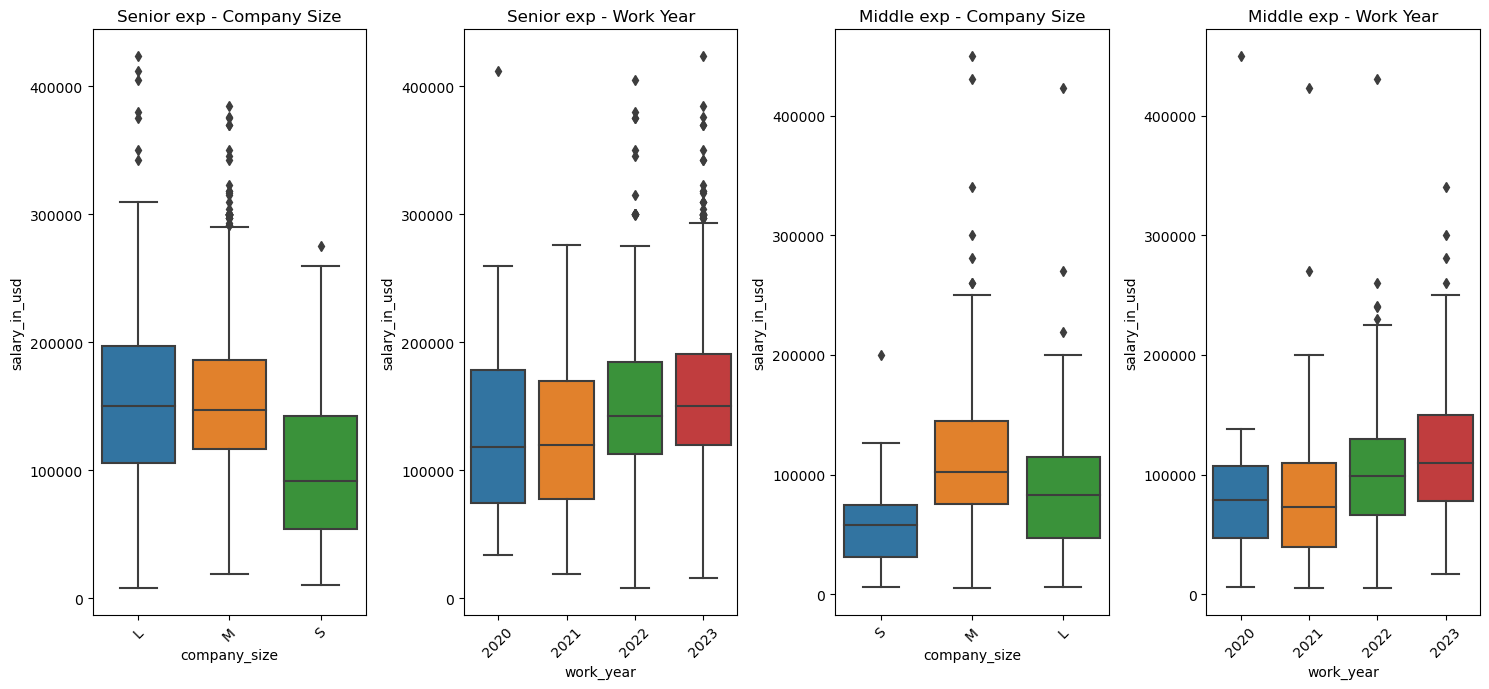

In [19]:
df_senior = df[df['experience_level']=='SE']
df_middle=df[df['experience_level']=='MI']
fig, axs=plt.subplots(1,4, figsize=(15,7))
sns.boxplot(data=df_senior,x='company_size', y='salary_in_usd', ax = axs[0])
sns.boxplot(data=df_senior,x='work_year', y='salary_in_usd', ax = axs[1])
sns.boxplot(data=df_middle,x='company_size', y='salary_in_usd', ax = axs[2])
sns.boxplot(data=df_middle,x='work_year', y='salary_in_usd', ax = axs[3])
axs[0].set_title('Senior exp - Company Size')
axs[1].set_title('Senior exp - Work Year')
axs[2].set_title('Middle exp - Company Size')
axs[3].set_title('Middle exp - Work Year')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

**Senior experience**
* Outliers spread into large and medium sized companies, in 2022 and 2023 years.

**Middle experience**
* Medium companies salaries median higher than large companies. Few outliers divided mostly in medium companies and some in large. Dispersed from 2020 to 2023.

### Large and medium companies for senior experience. vs job type

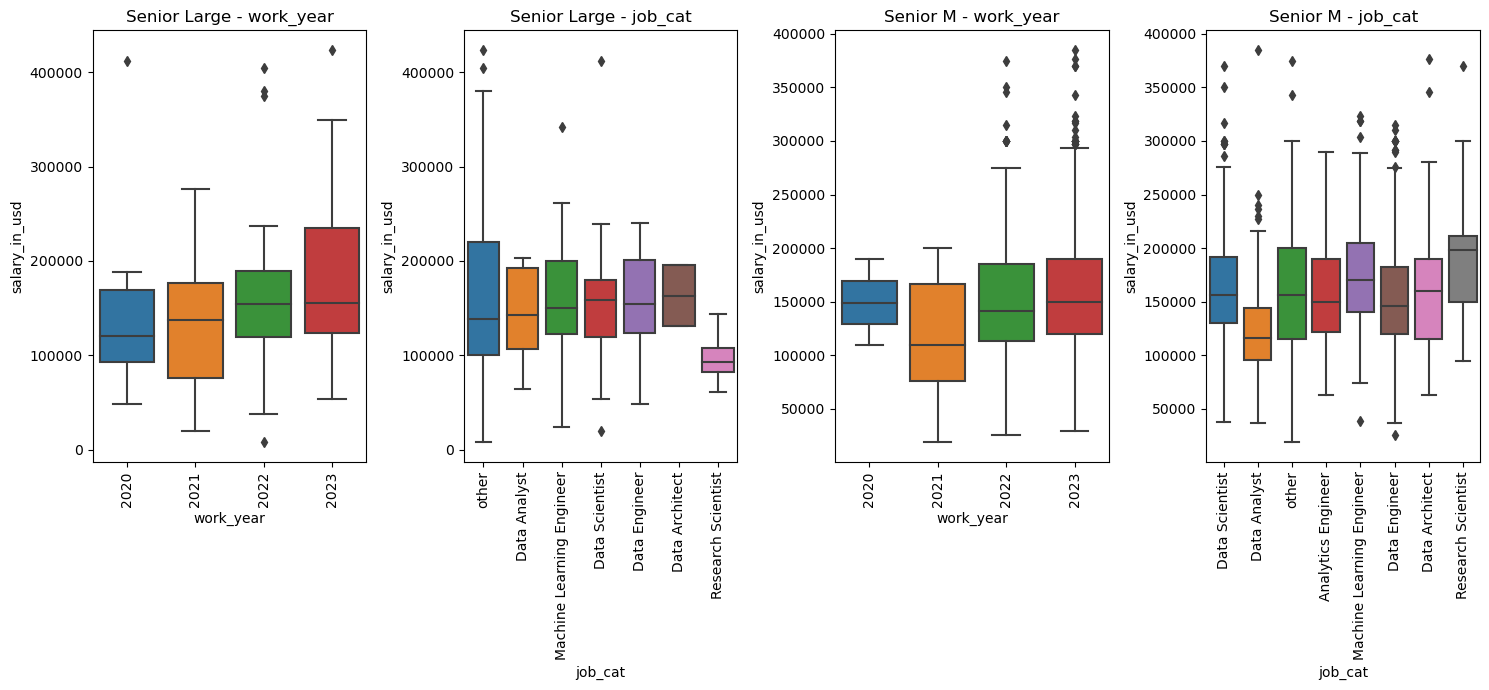

In [20]:
df_senior_l = df_senior[df_senior['company_size']=='L']
df_senior_m =df_senior[df_senior['company_size']=='M']
fig, axs=plt.subplots(1,4, figsize=(15,7))
sns.boxplot(data=df_senior_l,x='work_year', y='salary_in_usd', ax = axs[0])
sns.boxplot(data=df_senior_l,x='job_cat', y='salary_in_usd', ax = axs[1])
sns.boxplot(data=df_senior_m,x='work_year', y='salary_in_usd', ax = axs[2])
sns.boxplot(data=df_senior_m,x='job_cat', y='salary_in_usd', ax = axs[3])
axs[0].set_title('Senior Large - work_year')
axs[1].set_title('Senior Large - job_cat')
axs[2].set_title('Senior M - work_year')
axs[3].set_title('Senior M - job_cat')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

* Senior large, prevail other jobs category as main outliers.
* Senior medium, spread among main jobs category

#### Senior in large companies

In [21]:
df_senior_l_out = df_senior_l[df_senior_l['salary_in_usd']>upper_limit]['job_title'].value_counts().to_frame()
df_senior_l_out = df_senior_l_out.rename(columns={'job_title':'count'})
df_senior_l_out['percentage']=round(100*df_senior_l_out['count']/df_senior_l_out['count'].sum(),0)
df_senior_l_out['cumulative_percentage'] = round(df_senior_l_out['percentage'].cumsum()/df_senior_l_out['percentage'].sum()*100,0)
df_senior_l_out

,count,percentage,cumulative_percentage
Applied Scientist,3,33.0,33.0
Machine Learning Engineer,1,11.0,44.0
AI Scientist,1,11.0,56.0
Data Science Tech Lead,1,11.0,67.0
Data Analytics Lead,1,11.0,78.0
Applied Data Scientist,1,11.0,89.0
Data Scientist,1,11.0,100.0


* For senior experienced in large companies specialized applied scientist roles receive more salary.

#### Senior in middle sized companies

In [22]:
df_senior_m_out = df_senior_m[df_senior_m['salary_in_usd']>upper_limit]['job_title'].value_counts().to_frame()
df_senior_m_out = df_senior_m_out.rename(columns={'job_title':'count'})
df_senior_m_out['percentage']=round(100*df_senior_m_out['count']/df_senior_m_out['count'].sum(),0)
df_senior_m_out['cumulative_percentage'] = round(df_senior_m_out['percentage'].cumsum()/df_senior_m_out['percentage'].sum()*100,0)
df_senior_m_out

,count,percentage,cumulative_percentage
Data Scientist,8,24.0,24.0
Data Engineer,8,24.0,47.0
Data Science Manager,7,21.0,68.0
Machine Learning Engineer,4,12.0,79.0
Data Architect,2,6.0,85.0
Research Scientist,2,6.0,91.0
Computer Vision Engineer,1,3.0,94.0
Machine Learning Software Engineer,1,3.0,97.0
Data Analyst,1,3.0,100.0


In [23]:
df_senior_l_out_1 = df_senior_l[(df_senior_l['salary_in_usd']>upper_limit) & (df_senior_l['work_year']>2020)]

import pandas as pd

# Assuming you have a DataFrame named df_senior_m_out_1
pivot_table = pd.pivot_table(df_senior_l_out_1, index='job_title', columns='work_year', aggfunc='size', fill_value=0)

# Add a Total column to the pivot table
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the percentage over the total
pivot_table['percentage'] = round(pivot_table['Total'] / pivot_table['Total'].sum() * 100,0)

# Sort the pivot table by the Total column in descending order
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table['cumulative_percentage'] = round(pivot_table['percentage'].cumsum()/pivot_table['percentage'].sum()*100,0)

# Display the pivot table
pivot_table

work_year,2022,2023,Total,percentage,cumulative_percentage
job_title,,,,,
Applied Scientist,0,3,3,38.0,39.0
AI Scientist,0,1,1,12.0,51.0
Applied Data Scientist,1,0,1,12.0,63.0
Data Analytics Lead,1,0,1,12.0,76.0
Data Science Tech Lead,1,0,1,12.0,88.0
Machine Learning Engineer,0,1,1,12.0,100.0


* Applied Scientist or Applied data Scientist explain the 50% of the outstanding salaries for senior experienced in large companies

In [24]:
df_senior_m_out_1 = df_senior_m[df_senior_m['salary_in_usd']>upper_limit]

import pandas as pd

# Assuming you have a DataFrame named df_senior_m_out_1
pivot_table = pd.pivot_table(df_senior_m_out_1, index='job_title', columns='work_year', aggfunc='size', fill_value=0)

# Add a Total column to the pivot table
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the percentage over the total
pivot_table['percentage'] = round(pivot_table['Total'] / pivot_table['Total'].sum() * 100,0)

# Sort the pivot table by the Total column in descending order
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table['cumulative_percentage'] = round(pivot_table['percentage'].cumsum()/pivot_table['percentage'].sum()*100,0)

# Display the pivot table
pivot_table

work_year,2022,2023,Total,percentage,cumulative_percentage
job_title,,,,,
Data Engineer,5,3,8,24.0,24.0
Data Scientist,1,7,8,24.0,47.0
Data Science Manager,2,5,7,21.0,68.0
Machine Learning Engineer,0,4,4,12.0,79.0
Data Architect,1,1,2,6.0,85.0
Research Scientist,1,1,2,6.0,91.0
Computer Vision Engineer,0,1,1,3.0,94.0
Data Analyst,0,1,1,3.0,97.0
Machine Learning Software Engineer,1,0,1,3.0,100.0


* Data scientist, data engineer, data scientist manager and machine learning engineer are the top job titles with outstanding salaries in middle companies for senior experienced job positions

* Just to confirm, will make a histogram for the 80% cumulative job titles in senior experience for medium sized companies, the goal is to analyze how is the distribution.

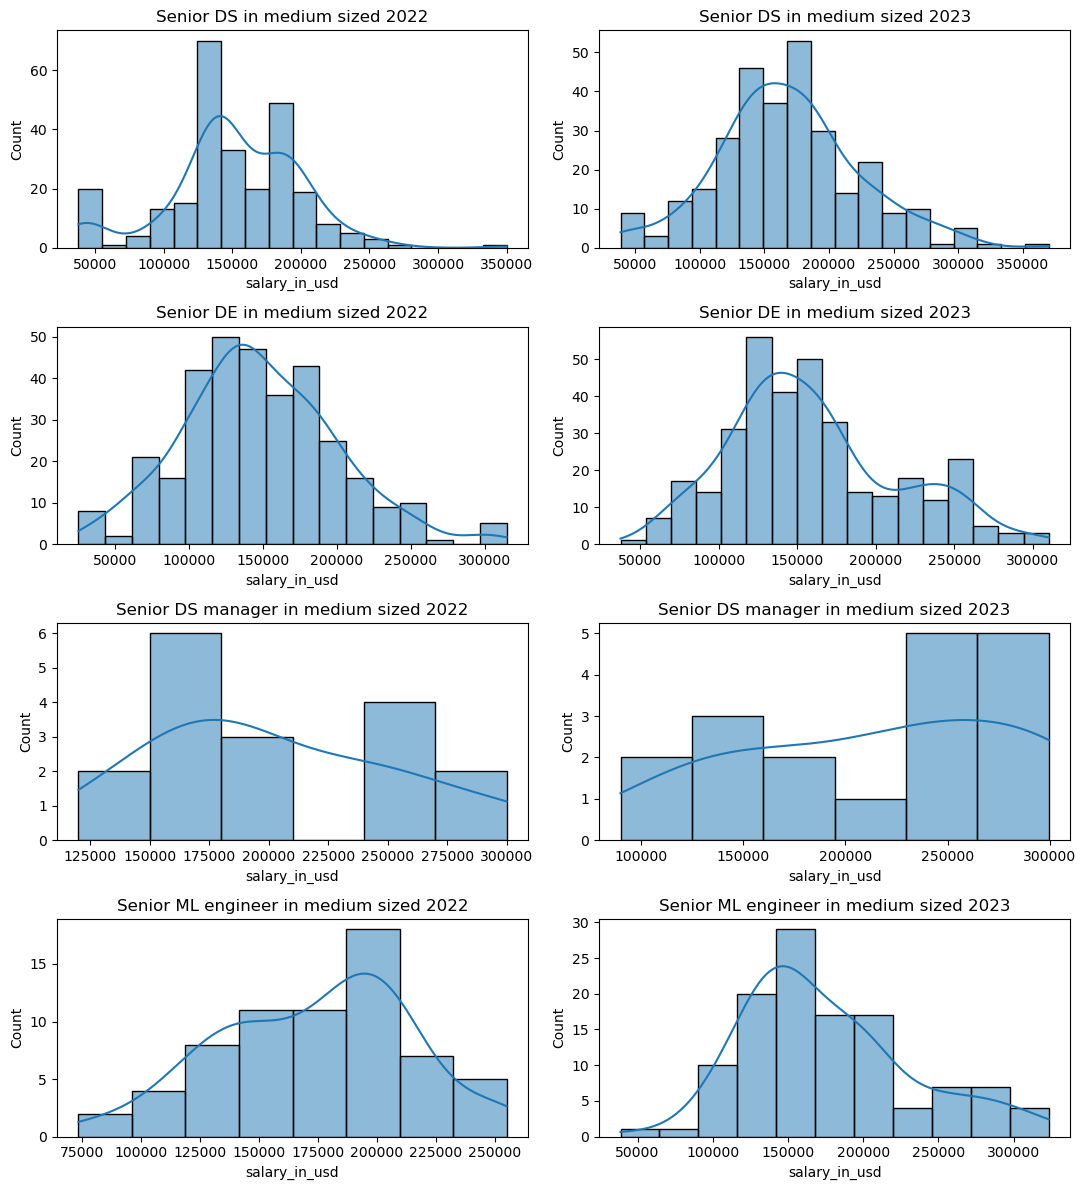

In [25]:
df_1 = df[(df['job_title']=='Data Scientist') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2022)]
df_2 = df[(df['job_title']=='Data Scientist') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2023)]
df_3 = df[(df['job_title']=='Data Engineer') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2022)]
df_4 = df[(df['job_title']=='Data Engineer') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2023)]
df_5 = df[(df['job_title']=='Data Science Manager') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2022)]
df_6 = df[(df['job_title']=='Data Science Manager') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2023)]
df_7 = df[(df['job_title']=='Machine Learning Engineer') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2022)]
df_8 = df[(df['job_title']=='Machine Learning Engineer') & (df['experience_level']=='SE') & (df['company_size']=='M') & (df['work_year']==2023)]
fig, axs= plt.subplots(4,2, figsize=(11,12))
sns.histplot(data=df_1,x='salary_in_usd',kde=True, ax=axs[0,0])
sns.histplot(data=df_2,x='salary_in_usd',kde=True, ax=axs[0,1])
sns.histplot(data=df_3,x='salary_in_usd',kde=True, ax=axs[1,0])
sns.histplot(data=df_4,x='salary_in_usd',kde=True, ax=axs[1,1])
sns.histplot(data=df_5,x='salary_in_usd',kde=True, ax=axs[2,0])
sns.histplot(data=df_6,x='salary_in_usd',kde=True, ax=axs[2,1])
sns.histplot(data=df_7,x='salary_in_usd',kde=True, ax=axs[3,0])
sns.histplot(data=df_8,x='salary_in_usd',kde=True, ax=axs[3,1])
axs[0,0].set_title('Senior DS in medium sized 2022')
axs[0,1].set_title('Senior DS in medium sized 2023')
axs[1,0].set_title('Senior DE in medium sized 2022')
axs[1,1].set_title('Senior DE in medium sized 2023')
axs[2,0].set_title('Senior DS manager in medium sized 2022')
axs[2,1].set_title('Senior DS manager in medium sized 2023')
axs[3,0].set_title('Senior ML engineer in medium sized 2022')
axs[3,1].set_title('Senior ML engineer in medium sized 2023')
#for ax in axs:
#   ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.tight_layout()
plt.show()

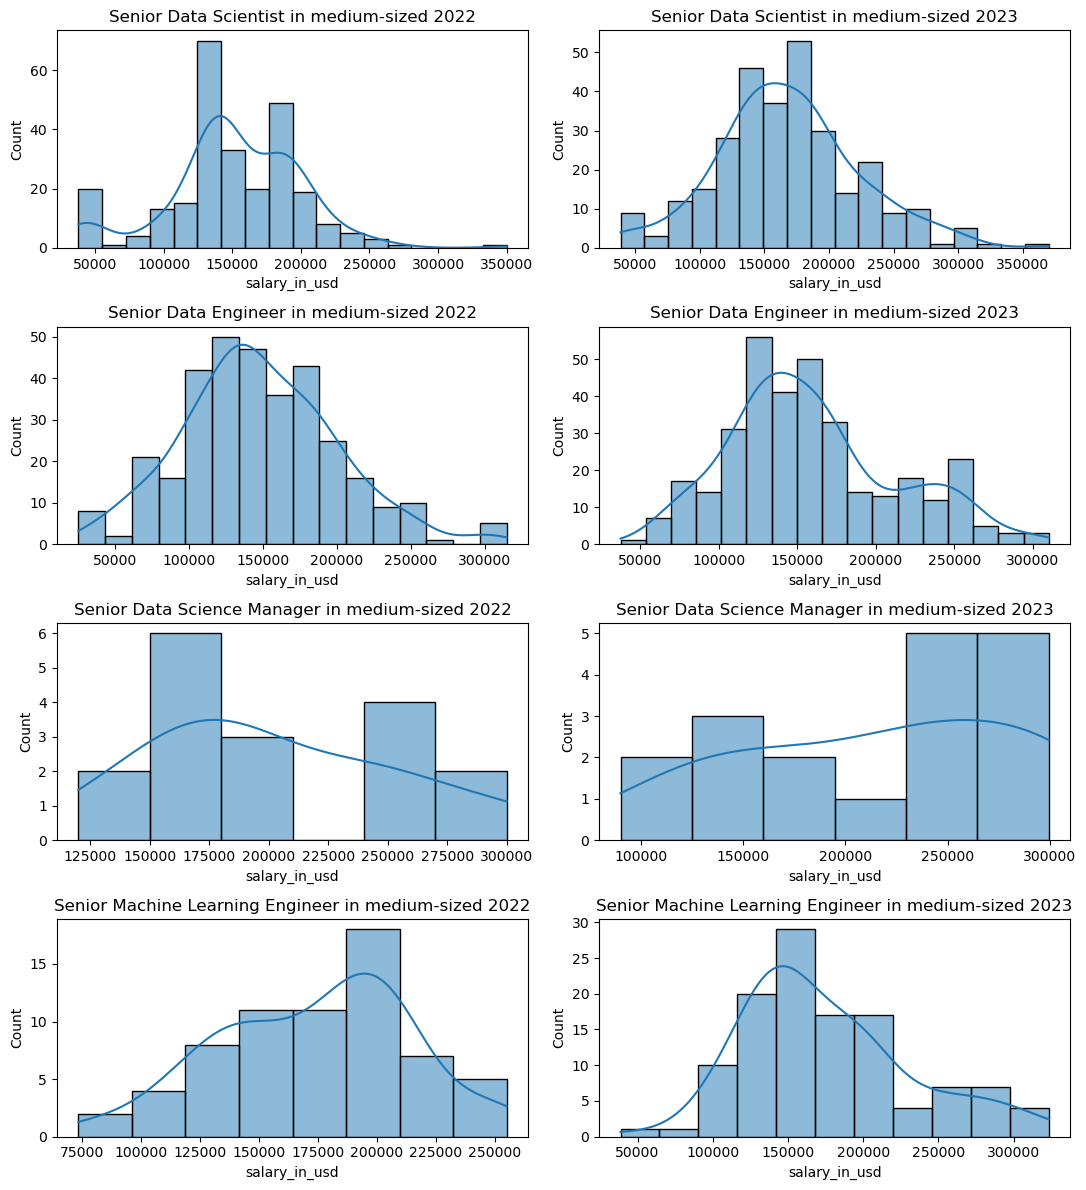

In [26]:
job_titles = []
cumulative_sum = 0
threshold = 80  # The threshold for the cumulative percentage

for job_title, row in df_senior_m_out.iterrows():
    job_titles.append(job_title)
    cumulative_sum += row['percentage']

    if cumulative_sum >= threshold:
        break

job_titles = ['Data Scientist', 'Data Engineer', 'Data Science Manager', 'Machine Learning Engineer']
work_years = [2022, 2023]

fig, axs = plt.subplots(4, 2, figsize=(11, 12))

for i, job_title in enumerate(job_titles):
    for j, work_year in enumerate(work_years):
        df_subset = df[(df['job_title'] == job_title) &
                       (df['experience_level'] == 'SE') &
                       (df['company_size'] == 'M') &
                       (df['work_year'] == work_year)]

        sns.histplot(data=df_subset, x='salary_in_usd', kde=True, ax=axs[i, j])
        axs[i, j].set_title(f'Senior {job_title} in medium-sized {work_year}')

plt.tight_layout()
plt.show()

**Senior data scientist in medium sized companies**
* Peak of salary above 150,000 USD in 2023 higher than 2022 which is below 150,000 USD.
* Both salary distributions right skewed which means that frequency decreases as the salary increases.

**Senior data engineer in medium sized companies**
* Peak of salary mantains constant over 2022 and 2023 years.
* 2023 histograms tends to bimodality due a second lower peak around 250,000 USD to analyze further.

**Senior data science manager in medium sized companies**
* Fewer frequency than the prevous job positions with a peak in 2023 around 250,000 USD which partially explain the salaries outliers.

**Senior machine learning engineer**
* Peak of salary below in 2023 than 2022 from up to 200,000 USD to 150,000 USD, indeed 2022 histogram is right skewe which is an outlier because goes against the overall price pattern.

## 2.  Why medium companies have higher median salaries than large companies?

Text(0.5, 1.0, 'medium_company & expert_experience')

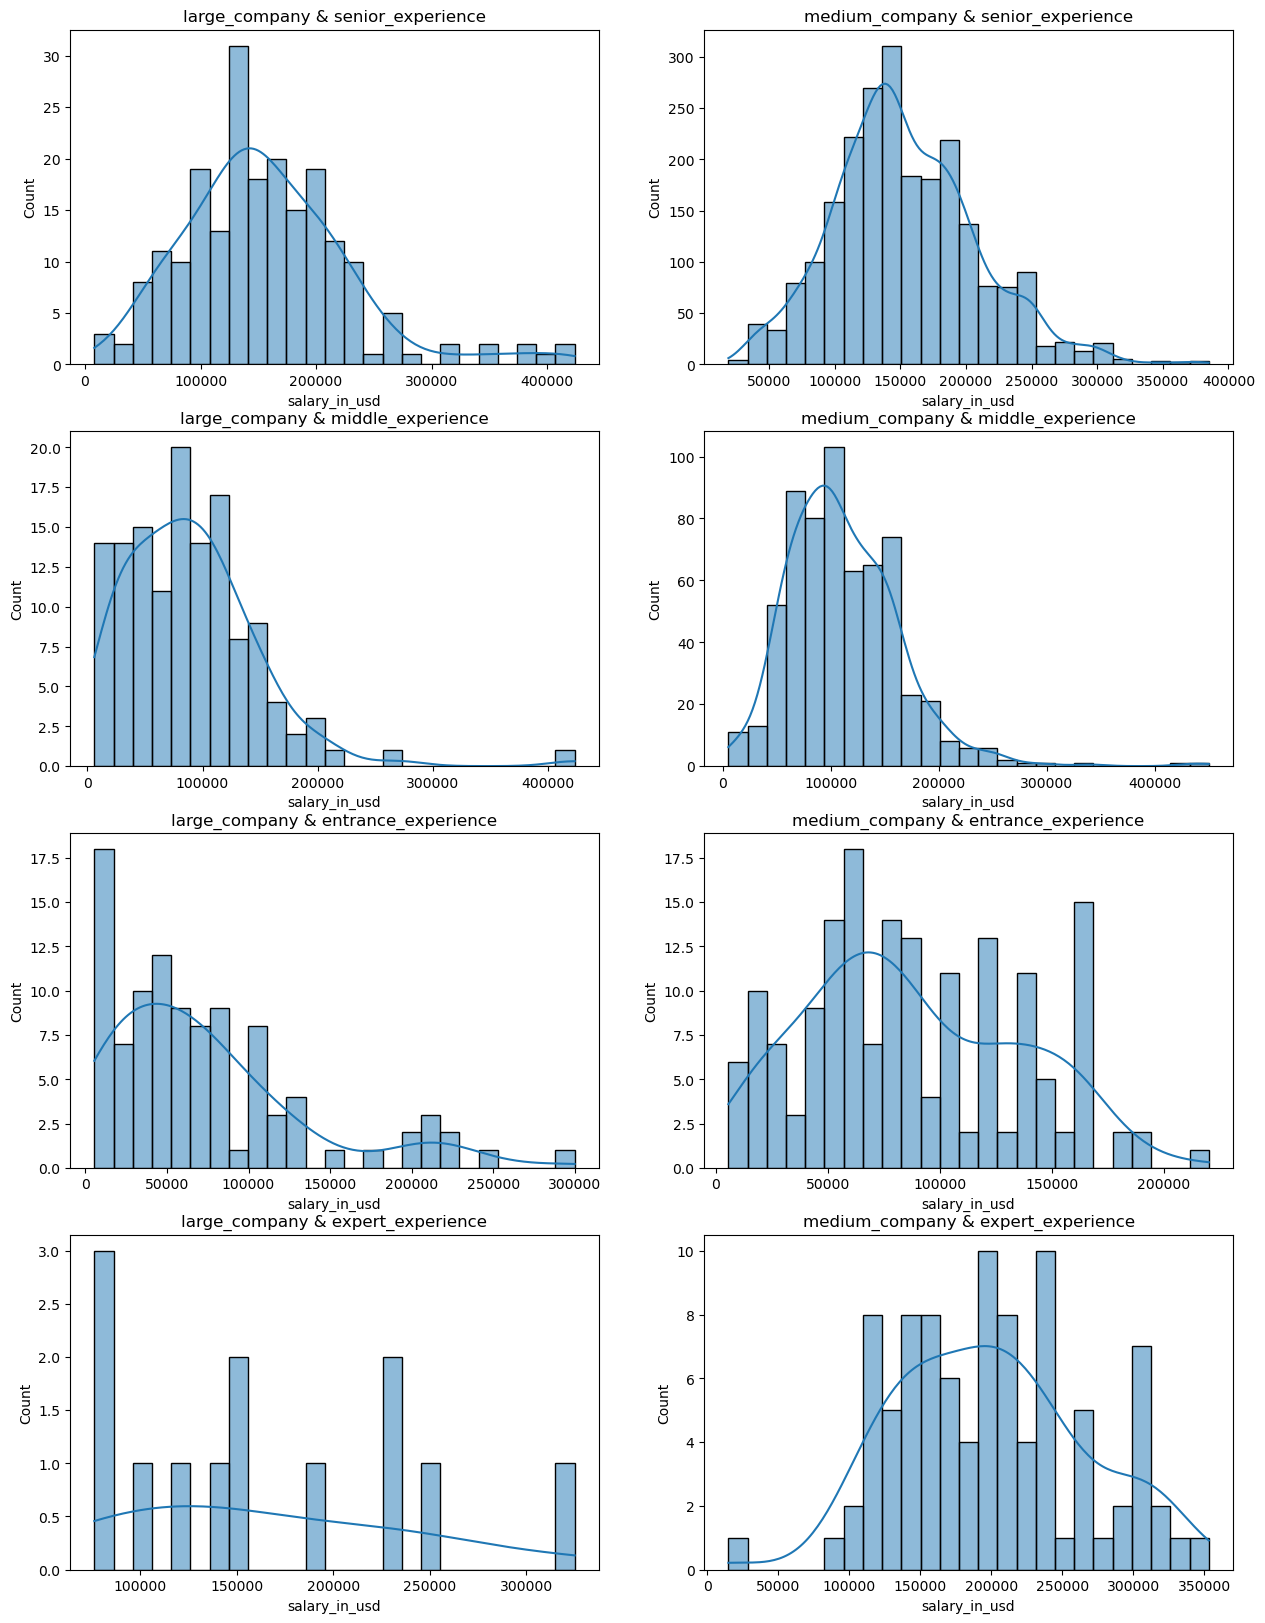

In [27]:
#SE, MI, EN, EX
df_l_se = df[(df['company_size']=='L') & (df['experience_level']=='SE')]
df_l_mi = df[(df['company_size']=='L') & (df['experience_level']=='MI')]
df_l_en = df[(df['company_size']=='L') & (df['experience_level']=='EN')]
df_l_ex = df[(df['company_size']=='L') & (df['experience_level']=='EX')]
df_m_se = df[(df['company_size']=='M') & (df['experience_level']=='SE')]
df_m_mi = df[(df['company_size']=='M') & (df['experience_level']=='MI')]
df_m_en = df[(df['company_size']=='M') & (df['experience_level']=='EN')]
df_m_ex = df[(df['company_size']=='M') & (df['experience_level']=='EX')]
#fig
fig,axs=plt.subplots(4,2,figsize=(15,20))
sns.histplot(data=df_l_se,x='salary_in_usd',ax=axs[0,0], kde=True, bins=25)
sns.histplot(data=df_m_se,x='salary_in_usd',ax=axs[0,1], kde=True, bins=25)
sns.histplot(data=df_l_mi,x='salary_in_usd',ax=axs[1,0], kde=True, bins=25)
sns.histplot(data=df_m_mi,x='salary_in_usd',ax=axs[1,1], kde=True, bins=25)
sns.histplot(data=df_l_en,x='salary_in_usd',ax=axs[2,0], kde=True, bins=25)
sns.histplot(data=df_m_en,x='salary_in_usd',ax=axs[2,1], kde=True, bins=25)
sns.histplot(data=df_l_ex,x='salary_in_usd',ax=axs[3,0], kde=True, bins=25)
sns.histplot(data=df_m_ex,x='salary_in_usd',ax=axs[3,1], kde=True, bins=25)

#title
axs[0,0].set_title('large_company & senior_experience')
axs[0,1].set_title('medium_company & senior_experience')
axs[1,0].set_title('large_company & middle_experience')
axs[1,1].set_title('medium_company & middle_experience')
axs[2,0].set_title('large_company & entrance_experience')
axs[2,1].set_title('medium_company & entrance_experience')
axs[3,0].set_title('large_company & expert_experience')
axs[3,1].set_title('medium_company & expert_experience')

In [28]:
from tabulate import tabulate

#Large companies
# Calculate mean, median, and count values
data_frames = {'Large company Senior experience': df_l_se, 'Large company Middle experience': df_l_mi, 'Large company Entrance experience': df_l_en, 'Large company expert experience': df_l_ex}
mean_values = [df['salary_in_usd'].mean() for df in data_frames.values()]
median_values = [df['salary_in_usd'].median() for df in data_frames.values()]
count_values = [df['salary_in_usd'].count() for df in data_frames.values()]

# Calculate the total count
total_count = sum(count_values)

# Create a list of lists for the table
table_data = []
for category, mean, median, count in zip(data_frames.keys(), mean_values, median_values, count_values):
    percentage = round((count / total_count) * 100, 2)
    table_data.append([category, round(mean, 0), round(median, 0), count, percentage])

# Display the table
table_headers = ['Category', 'Mean', 'Median', 'Count', 'Percentage']
print(tabulate(table_data, headers=table_headers, tablefmt='fancy_grid'))



╒═══════════════════════════════════╤════════╤══════════╤═════════╤══════════════╕
│ Category                          │   Mean │   Median │   Count │   Percentage │
╞═══════════════════════════════════╪════════╪══════════╪═════════╪══════════════╡
│ Large company Senior experience   │ 156160 │   150000 │     207 │        45.59 │
├───────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Large company Middle experience   │  89136 │    82850 │     134 │        29.52 │
├───────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Large company Entrance experience │  72897 │    58551 │     100 │        22.03 │
├───────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Large company expert experience   │ 165363 │   150000 │      13 │         2.86 │
╘═══════════════════════════════════╧════════╧══════════╧═════════╧══════════════╛


In [29]:
#Medium companies
# Calculate mean, median, and count values
data_frames = {'Medium company Senior experience': df_m_se, 'Medium company Middle experience': df_m_mi, 'Medium company Entrance experience': df_m_en, 'Medium company expert experience': df_m_ex}
mean_values = [df['salary_in_usd'].mean() for df in data_frames.values()]
median_values = [df['salary_in_usd'].median() for df in data_frames.values()]
count_values = [df['salary_in_usd'].count() for df in data_frames.values()]

# Calculate the total count
total_count = sum(count_values)

# Create a list of lists for the table
table_data = []
for category, mean, median, count in zip(data_frames.keys(), mean_values, median_values, count_values):
    percentage = round((count / total_count) * 100, 2)
    table_data.append([category, round(mean, 0), round(median, 0), count, percentage])

# Display the table
table_headers = ['Category', 'Mean', 'Median', 'Count', 'Percentage']
print(tabulate(table_data, headers=table_headers, tablefmt='fancy_grid'))

╒════════════════════════════════════╤════════╤══════════╤═════════╤══════════════╕
│ Category                           │   Mean │   Median │   Count │   Percentage │
╞════════════════════════════════════╪════════╪══════════╪═════════╪══════════════╡
│ Medium company Senior experience   │ 153643 │   147100 │    2266 │        71.87 │
├────────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Medium company Middle experience   │ 111586 │   102200 │     621 │        19.7  │
├────────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Medium company Entrance experience │  87416 │    80000 │     171 │         5.42 │
├────────────────────────────────────┼────────┼──────────┼─────────┼──────────────┤
│ Medium company expert experience   │ 198857 │   200000 │      95 │         3.01 │
╘════════════════════════════════════╧════════╧══════════╧═════════╧══════════════╛


* Expert experience: Median in large companies is lower than Medium companies

* Senior experience: Median in Large companies is higher than Medium companies

* Middle experience: Median in Large companies is lower than Medium companies

* Entrance experience: Median in Large companies is lower than Medium companies

**Middle-sized companies offer higher salaries for Expert and Middle positions than larger counterparts**

## Conclusion

Median salary increases as time goes, while full employees have highest median salaries. Median salaries are higher in median sized companies due more contribution of senior experience in mid sized companies (71%) which receive more salaries.

There are interesting higher salaries for senior experience in large and mid-sized companies. 
In large companies, higher salaries belong for specialized applied scientist roles.
In Mid-sized companies, higher salaries belong for main jobs categories sucha as Data Scientist, Data Engineer, Data scientist Manager and Machine Learning Engineer

Middle-sized companies offer higher salaries for Expert and Middle positions than larger counterparts.

**Consider that the data was collected from an online survey, which tends to be biased. Therefore, it is advisable to interpret the results as purely indicative information**